In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the file

In [4]:
# Load csv file in notebook using python code 
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
# Total Records
row_count = df.shape[0]
print(row_count)
df.head()

5110


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data cleaning

In [5]:
#Null count in entire dataframe
null_count = df.isna().sum().sum()
print("Total null count in dataframe: ",null_count)

Total null count in dataframe:  201


In [6]:
#Null count in specific column
null_count_column = df['bmi'].isna().sum()
print("Null count column wise: ",null_count_column)

Null count column wise:  201


In [7]:
# Mean for numerical column
df2 = df[["age","avg_glucose_level","bmi"]].mean()
print(df2)


age                   43.226614
avg_glucose_level    106.147677
bmi                   28.893237
dtype: float64


In [8]:
# Median for numerical column
df2 = df[["age","avg_glucose_level","bmi"]].median()
print(df2)

age                  45.000
avg_glucose_level    91.885
bmi                  28.100
dtype: float64


In [9]:
# Standard deviation for numerical column
df2 = df[["age","avg_glucose_level","bmi"]].std()
print(df2)

age                  22.612647
avg_glucose_level    45.283560
bmi                   7.854067
dtype: float64


In [11]:
!pip install seaborn
import seaborn as sns
from seaborn import load_dataset

In [10]:
# Check if bmi column has null values
isNull = df['bmi'].isna().sum()
if isNull>0:
    print("Null count: ",isNull)
else:
    print("Null count: ",0)
    


Null count:  201


In [11]:
#replacing null values with median
median_value=df['bmi'].median()
df['bmi'].fillna(value=median_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             2

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

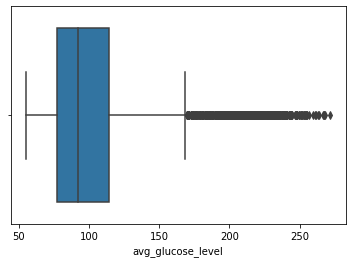

In [12]:
#to detect outliers: before
import seaborn as sns
sns.boxplot(df['avg_glucose_level'])

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

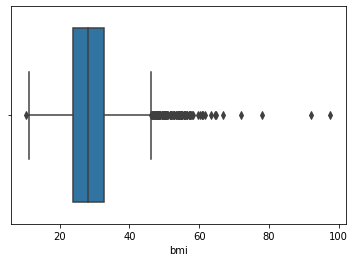

In [13]:
#to detect outliers: before
import seaborn as sns
sns.boxplot(df['bmi'])

In [14]:
#Removal of outliers
cols = ['avg_glucose_level', 'bmi'] # one or more
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

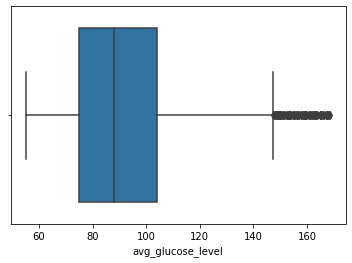

In [15]:
#After removal of outliers
import seaborn as sns
sns.boxplot(df['avg_glucose_level'])


C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

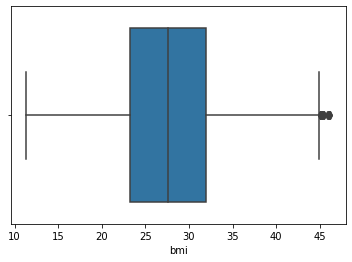

In [16]:
#After removal of outliers
import seaborn as sns
sns.boxplot(df['bmi'])

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
#Scaling of numerical columns
scaler = MinMaxScaler()

df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))
df['avg_glucose_level'] = scaler.fit_transform(df['avg_glucose_level'].values.reshape(-1,1))
df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.447341,0.607450,never smoked,1
6,53882,Male,0.902344,1,1,Yes,Private,Rural,0.131825,0.461318,never smoked,1
7,10434,Female,0.841309,0,0,No,Private,Urban,0.345808,0.329513,never smoked,1
8,27419,Female,0.719238,0,0,Yes,Private,Rural,0.185188,0.481375,Unknown,1
9,60491,Female,0.951172,0,0,Yes,Private,Urban,0.030380,0.369628,Unknown,1


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
# checking features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [22]:
#label-encoding for 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['gender'].unique()

df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['ever_married'].unique()

df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['Residence_type'].unique()

array([0, 1])

In [23]:
one_hot = pd.get_dummies(df['work_type'])
df = df.drop('work_type',axis = 1)
df = df.join(one_hot)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
2,31112,1,0.975586,0,1,1,0,0.447341,0.607450,never smoked,1,0,0,1,0,0
6,53882,1,0.902344,1,1,1,0,0.131825,0.461318,never smoked,1,0,0,1,0,0
7,10434,0,0.841309,0,0,0,1,0.345808,0.329513,never smoked,1,0,0,1,0,0
8,27419,0,0.719238,0,0,1,0,0.185188,0.481375,Unknown,1,0,0,1,0,0
9,60491,0,0.951172,0,0,1,1,0.030380,0.369628,Unknown,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0.975586,1,0,1,1,0.252113,0.481375,never smoked,0,0,0,1,0,0
5106,44873,0,0.987793,0,0,1,1,0.617119,0.822350,never smoked,0,0,0,0,1,0
5107,19723,0,0.426270,0,0,1,0,0.245421,0.553009,never smoked,0,0,0,0,1,0
5108,37544,1,0.621582,0,0,1,0,0.978954,0.409742,formerly smoked,0,0,0,1,0,0


In [24]:
one_hot_smoking_status = pd.get_dummies(df['smoking_status'])
df = df.drop('smoking_status',axis = 1)
df = df.join(one_hot_smoking_status)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
2,31112,1,0.975586,0,1,1,0,0.447341,0.607450,1,0,0,1,0,0,0,0,1,0
6,53882,1,0.902344,1,1,1,0,0.131825,0.461318,1,0,0,1,0,0,0,0,1,0
7,10434,0,0.841309,0,0,0,1,0.345808,0.329513,1,0,0,1,0,0,0,0,1,0
8,27419,0,0.719238,0,0,1,0,0.185188,0.481375,1,0,0,1,0,0,1,0,0,0
9,60491,0,0.951172,0,0,1,1,0.030380,0.369628,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0.975586,1,0,1,1,0.252113,0.481375,0,0,0,1,0,0,0,0,1,0
5106,44873,0,0.987793,0,0,1,1,0.617119,0.822350,0,0,0,0,1,0,0,0,1,0
5107,19723,0,0.426270,0,0,1,0,0.245421,0.553009,0,0,0,0,1,0,0,0,1,0
5108,37544,1,0.621582,0,0,1,0,0.978954,0.409742,0,0,0,1,0,0,0,1,0,0


In [25]:
median_value=df['bmi'].median()
df['bmi'].fillna(value=median_value, inplace=True)
print('Updated Dataframe:')
df.head()

Updated Dataframe:


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
2,31112,1,0.975586,0,1,1,0,0.447341,0.607450,1,0,0,1,0,0,0,0,1,0
6,53882,1,0.902344,1,1,1,0,0.131825,0.461318,1,0,0,1,0,0,0,0,1,0
7,10434,0,0.841309,0,0,0,1,0.345808,0.329513,1,0,0,1,0,0,0,0,1,0
8,27419,0,0.719238,0,0,1,0,0.185188,0.481375,1,0,0,1,0,0,1,0,0,0
9,60491,0,0.951172,0,0,1,1,0.030380,0.369628,1,0,0,1,0,0,1,0,0,0


In [26]:
l=df.pop('stroke')
df['stroke']=l


# feature importance - feature selection

[1.04461728e-02 3.69162953e-03 2.82010875e-02 6.40985616e-03
 3.13187901e-03 4.00897546e-03 4.06348156e-03 1.09401393e-02
 9.13910712e-03 1.39152252e-03 4.49046618e-06 1.78252508e-03
 2.93021244e-03 8.85677642e-04 1.47815306e-03 2.32990815e-03
 2.05932458e-03 1.71498757e-03 9.05390870e-01]


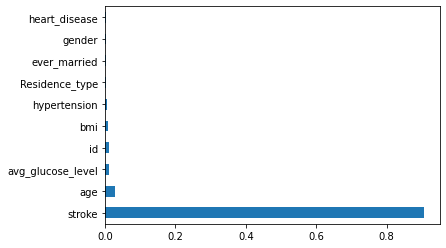

In [27]:

X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap - feature selection

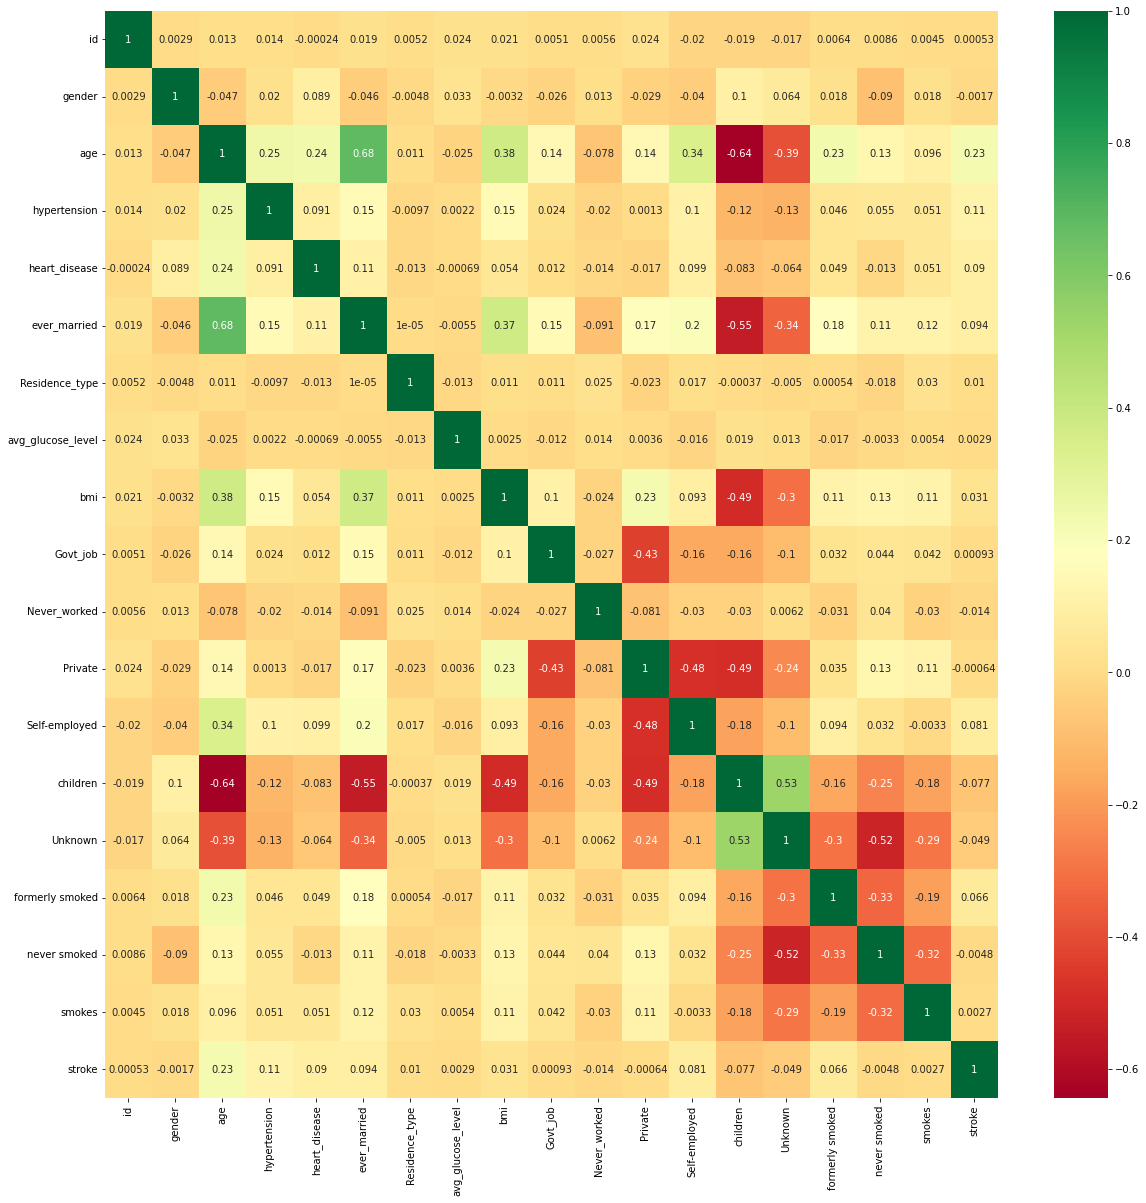

In [28]:

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Univariate selection - feature selection

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [31]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))

              Specs        Score
18           stroke  4226.000000
3      hypertension    51.957021
2               age    34.377298
4     heart_disease    33.972023
12    Self-employed    24.421186
13         children    22.323591
15  formerly smoked    16.246222
0                id    15.160302
5      ever_married    14.774166
14          Unknown     7.251553


# removal of id and ever_married column - feature selection

In [32]:

df.drop(['id'], axis=1,inplace=True)
df.drop(['ever_married'], axis=1,inplace=True)

In [33]:
# 1. New Dataframe after selecting features
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,stroke
2,1,0.975586,0,1,0,0.447341,0.607450,0,0,1,0,0,0,0,1,0,1
6,1,0.902344,1,1,0,0.131825,0.461318,0,0,1,0,0,0,0,1,0,1
7,0,0.841309,0,0,1,0.345808,0.329513,0,0,1,0,0,0,0,1,0,1
8,0,0.719238,0,0,0,0.185188,0.481375,0,0,1,0,0,1,0,0,0,1
9,0,0.951172,0,0,1,0.030380,0.369628,0,0,1,0,0,1,0,0,0,1


# Splitting data into train, test, validate

In [34]:
#train-test-validate - method1
from sklearn.model_selection import train_test_split
print("Original", df.shape)
train, test = train_test_split(df, test_size=0.2)
print("Training and testing: ",train.shape, test.shape)
val, test = train_test_split(test, test_size=0.5)
print("Training, testing and validation: ",train.shape,val.shape,test.shape)

Original (4391, 17)
Training and testing:  (3512, 17) (879, 17)
Training, testing and validation:  (3512, 17) (439, 17) (440, 17)


In [35]:
#train-test-validate - method2
# setting aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_test.shape)) 

X_train shape: (2634, 19)
X_test shape: (879, 19)
y_train shape: (2634,)
y_test shape: (879,)
X_val shape: (2634,)
y_val shape: (879,)


# Training the model - Logistic Regression

In [36]:
#Training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

#testing the model
predictions = model.predict(X_test)
print("Predictions: ",predictions.shape)

Predictions:  (879,)


# Model Evaluation

In [37]:
#Testing accuracy - evaluation 1

from sklearn.metrics import classification_report
classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       849\n           1       1.00      0.90      0.95        30\n\n    accuracy                           1.00       879\n   macro avg       1.00      0.95      0.97       879\nweighted avg       1.00      1.00      1.00       879\n'

In [38]:
#Testing accuracy - evaluation 2
model.score(X_train, y_train)


0.9962034927866363

In [40]:
import sklearn 
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Model evaluation - confusion matrix, precision, recall, support

In [41]:

from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix = confusion_matrix(y_test, y_pred)
print(f1_score(y_test,y_pred))
print(confusion_matrix)
#correct predictions - wrong predictions

0.9473684210526316
[[849   0]
 [  3  27]]


In [42]:
#precision recall support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      0.90      0.95        30

    accuracy                           1.00       879
   macro avg       1.00      0.95      0.97       879
weighted avg       1.00      1.00      1.00       879



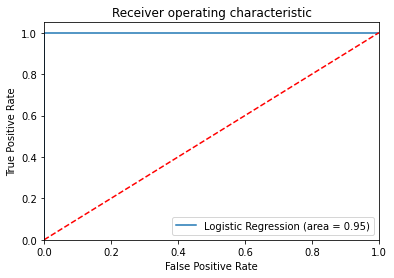

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model Training - DecisionTreeClassifier | LogisticRegression model gave inaccurate results due to overfitting

In [47]:
X_dtm = df.drop(['stroke'],axis=1)
Y_dtm = df['stroke']
from sklearn.model_selection import train_test_split

x_train_dtm, x_test_dtm, y_train_dtm, y_test_dtm = train_test_split(X_dtm, Y_dtm, test_size=0.2,random_state=0)
x_train_dtm, x_val_dtm, y_train_dtm, y_val_dtm = train_test_split(x_train_dtm, y_train_dtm, test_size=0.25,random_state=0)

from sklearn.tree import DecisionTreeClassifier  
decisionTree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)  
decisionTree_model.fit(x_train_dtm, y_train_dtm)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Testing of model - DecisionTreeClassifier

In [48]:
y_pred_dtm= decisionTree_model.predict(x_test_dtm)
print("Prediction ",y_pred_dtm.shape)

Prediction  (879,)


In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy Score of train data: ', accuracy_score(y_true=y_train_dtm, y_pred=decisionTree_model.predict(x_train_dtm)))
print('Accuracy Score of test data: ', accuracy_score(y_true=y_test_dtm, y_pred=y_pred_dtm))

Accuracy Score of train data:  1.0
Accuracy Score of test data:  0.9408418657565415


# Evaluation for DecisionTreeClassifier

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dtm,y_pred_dtm,target_names = ['No stroke','Stroke']))

              precision    recall  f1-score   support

   No stroke       0.97      0.96      0.97       850
      Stroke       0.21      0.28      0.24        29

    accuracy                           0.94       879
   macro avg       0.59      0.62      0.60       879
weighted avg       0.95      0.94      0.95       879



In [51]:
from sklearn.metrics import confusion_matrix,f1_score  
cf_matrix = confusion_matrix(y_test_dtm,y_pred_dtm)
print(cf_matrix)

[[819  31]
 [ 21   8]]


# tuning hyperparameters

In [47]:

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 4000]
    }
]

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Saving model to pickle file 

In [52]:
import pickle

In [53]:
with open('dt_model_pkl', 'wb') as files:
    pickle.dump(decisionTree_model, files)

In [54]:
with open('dt_model_pkl' , 'rb') as f:
    lr = pickle.load(f)
    y_val_predict=lr.predict(x_test_dtm)

In [56]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'Residence_type',
       'avg_glucose_level', 'bmi', 'Govt_job', 'Never_worked', 'Private',
       'Self-employed', 'children', 'Unknown', 'formerly smoked',
       'never smoked', 'smokes', 'stroke'],
      dtype='object')

# Predicting values for validate set using pickle file

In [57]:
r=pd.DataFrame(X_test,columns=['gender', 'age', 'hypertension', 'heart_disease', 'Residence_type',
       'avg_glucose_level', 'bmi', 'Govt_job', 'Never_worked', 'Private',
       'Self-employed', 'children', 'Unknown', 'formerly smoked',
       'never smoked', 'smokes'])
r['stroke']=y_test_dtm
r['stroke_predicted']=y_pred_dtm

# Writing file to csv file

In [58]:
r.to_csv('validation_final.csv',index=False)